In [10]:
! pip install --user nibabel
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize # from scipy.misc import imresize
from tqdm import tqdm
import nibabel

  Using cached https://files.pythonhosted.org/packages/01/13/392132019093ddb7bc997f7f9843d406dc3302a27f01827d2fd028e03c50/nibabel-2.5.1-py3-none-any.whl


In [11]:
def read_train_exam(exam_nb):
    image = nibabel.load('../chaos/train/%02d-T2SPIR-src.nii.gz'%(exam_nb))
    mask = nibabel.load('../chaos/train/%02d-T2SPIR-mask.nii.gz'%(exam_nb))
    return image, mask

def read_test_exam(exam_nb):
    image = nibabel.load('../chaos/test/%02d-T2SPIR-src.nii.gz'%(exam_nb))
    return image


In [ ]:
img_rows,img_cols = 256,256
def preprocess(image):
    #shape (slide,256,256)
    image_ = np.ndarray((image.shape[2],img_rows,img_cols,1))
    for i in range(image.shape[2]):
        image_[i,:,:,0] = resize(image.get_data()[:,:,i],(img_rows,img_cols),mode='reflect',preserve_range=True,
                               anti_aliasing=True)            
    #print(image_.shape)
    return image_

In [6]:
image_1, mask_1 = read_train_exam(2)


In [13]:
print("before scale {},{},".format(np.unique(mask_1.get_data()),np.unique(image_1.get_data())))

before scale [0 1 2 3 4],[   0    1    2 ... 1474 1501 1503],


In [14]:
print("after scale {},{}".format(np.unique(preprocess(mask_1)),np.unique(preprocess(image_1))))

after scale [0.       0.015625 0.015625 ... 3.984375 3.984375 4.      ],[0.00000000e+00 1.56250000e-02 1.56250000e-02 ... 1.45790625e+03
 1.46843750e+03 1.48428125e+03]


In [43]:
def mask_to_channels(mask,init,classes):
    #get mask for each class
    img = np.asarray([np.where(mask == i,1,0 ) for i in range(init,classes)])
    img = np.swapaxes(img,0,-1)#new shape (row,col,class)
    print(img.shape)
    return img

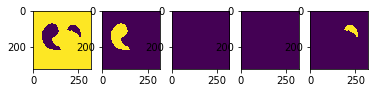

In [34]:
test = mask_1.get_data()[:,:,15]
img = mask_to_channels(test,0,5)
for i in range(0,5):
    plt.subplot(1,5,i+1)
    plt.imshow(img[:,:,i])
plt.show()

In [68]:
def create_data_train(train_ids = [1,2,3,5,8,10,13,19],background = 0):
    for idx, train_id in tqdm(enumerate(train_ids)):
        image, mask = read_train_exam(train_id)     
        image = preprocess(image)
        mask = preprocess(mask) 
        #transform le mask
        if background:
            #create mask for 5 classess
            mask = mask_to_channels(mask,0,5)[0]
        else:
            mask = mask_to_channels(mask,1,5)[0]            
       
        if idx > 0:
            train_data = np.concatenate((train_data, image),axis=0)
            train_mask = np.concatenate((train_mask, mask),axis=0)
        else:
            train_data = image
            train_mask = mask
    print("Final shape {},{}".format(train_data.shape,train_mask.shape))    
    np.savez_compressed('./dataset/imgs_train_{}'.format(background), imgs=train_data)
    np.savez_compressed('./dataset/imgs_mask_train_{}'.format(background), imgs_mask=train_mask)

In [46]:
#dataset training without background
create_data_train()

1it [00:00,  3.35it/s]

(1, 36, 256, 256, 4)


2it [00:00,  3.18it/s]

(1, 26, 256, 256, 4)


3it [00:01,  2.44it/s]

(1, 30, 256, 256, 4)


4it [00:01,  2.46it/s]

(1, 30, 256, 256, 4)


5it [00:02,  2.29it/s]

(1, 32, 256, 256, 4)
(1, 36, 256, 256, 4)


6it [00:02,  2.14it/s]

(1, 30, 256, 256, 4)


7it [00:03,  1.94it/s]

(1, 30, 256, 256, 4)


8it [00:04,  1.71it/s]


Final shape (250, 256, 256, 1),(250, 256, 256, 4)


In [48]:
#dataset training without background
create_data_train(background=1)

1it [00:00,  3.06it/s]

(1, 36, 256, 256, 5)


2it [00:00,  2.92it/s]

(1, 26, 256, 256, 5)


3it [00:01,  2.61it/s]

(1, 30, 256, 256, 5)


4it [00:01,  2.50it/s]

(1, 30, 256, 256, 5)
(1, 32, 256, 256, 5)


5it [00:02,  2.23it/s]

(1, 36, 256, 256, 5)


6it [00:02,  2.03it/s]

(1, 30, 256, 256, 5)


7it [00:03,  1.84it/s]

(1, 30, 256, 256, 5)


8it [00:04,  1.68it/s]


Final shape (250, 256, 256, 1),(250, 256, 256, 5)


### plot images

In [25]:
img = np.load('./dataset/imgs_train_0.npz')['imgs']
img_mask = np.load('./dataset/imgs_mask_train_0.npz')['imgs_mask']

In [53]:
img[:,:,:].shape

(250, 256, 256, 1)

In [54]:
img[:,:,:,0].shape

(250, 256, 256)

In [58]:
#plot random samples from data
def plot_random_images(data,mask,size,id):
    index = np.random.choice(range(data.shape[0]),size)
    plt.figure(figsize=(20, 15))
    for i,x in enumerate(index):
        plt.subplot(1, len(index), i+1)
        plt.imshow(data[x,:,:,0], cmap='gray', interpolation='nearest')
        plt.imshow(mask[x,:,:,id], cmap='jet', alpha=0.5)
    plt.show()

Training data


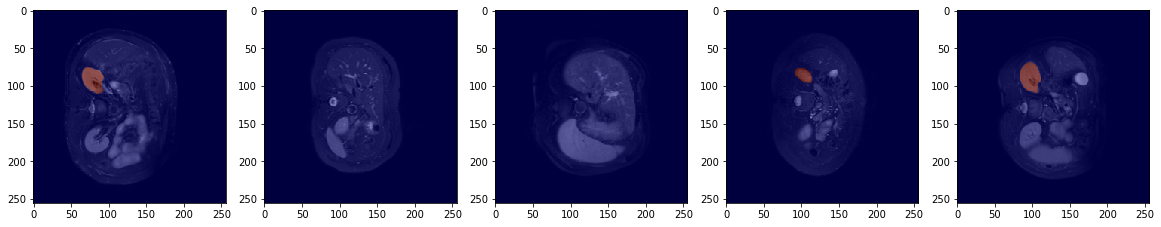

In [59]:
#plot random samples from training data
print("Training data")
plot_random_images(img,img_mask,5,1)

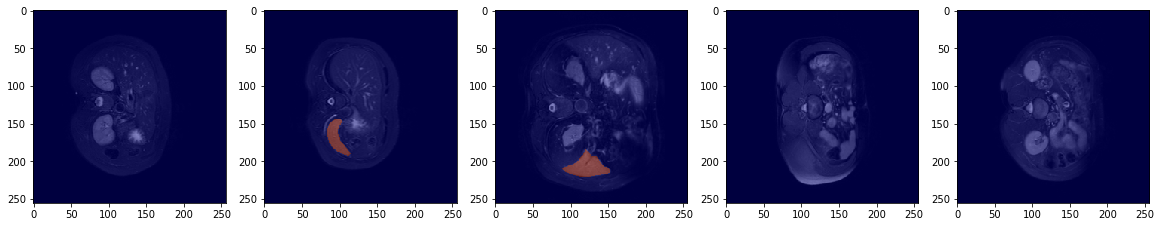

In [62]:
plot_random_images(img,img_mask,5,3)

In [66]:
print(np.unique(img))

[0.00000000e+00 1.00974196e-28 1.51461294e-28 ... 2.02000000e+03
 2.04100000e+03 2.04300000e+03]


In [26]:
imgs_train = img.astype('float32')
mean = np.mean(imgs_train)  # mean for data centering
std = np.std(imgs_train)  # std for data normalization

imgs_train -= mean
imgs_train /= std

In [67]:
print(np.unique(imgs_train))

[-0.53052306 -0.53049946 -0.53047585 ... 11.664149   11.790925
 11.8029995 ]


### test

In [69]:
def get_data_test(test_ids = [21,22,32,39]):
    for idx, test_id in tqdm(enumerate(test_ids)):
        image = read_test_exam(test_id)     
        image = preprocess(image)
        print("img {}".format(image.shape))
        if idx > 0:
            test_data = np.concatenate((test_data, image),axis=0)
        else:
            test_data = image
    print("Final shape {}".format(test_data.shape))    
    np.savez_compressed('./dataset/imgs_test', imgs=test_data)

In [70]:
get_data_test()

2it [00:00,  8.78it/s]

img (31, 256, 256, 1)
img (33, 256, 256, 1)


4it [00:00,  8.10it/s]

img (39, 256, 256, 1)
img (26, 256, 256, 1)
Final shape (129, 256, 256, 1)


# MODEL

In [51]:
#version tf1
from keras.models import Model
from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, Conv2DTranspose
from keras.optimizers import Adam,SGD
from keras.callbacks import ModelCheckpoint
from keras import backend as K


from data import load_train_data, load_test_data

K.set_image_data_format('channels_last')  # TF dimension ordering in this code

In [52]:
img_rows = 256
img_cols = 256

In [104]:
smooth = 1.
#batch 32!
def dice_coef_(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coef(y_true, y_pred):
    dice_liver = dice_coef_(y_true[0,:,:,0],y_pred[0,:,:,0])
    dice_rkidney = dice_coef_(y_true[0,:,:,1], y_pred[0,:,:,1])
    dice_lkidney = dice_coef_(y_true[0,:,:,2], y_pred[0,:,:,2])
    dice_spleen = dice_coef_(y_true[0,:,:,3], y_pred[0,:,:,3])
    #return dice_liver + (dice_rkidney+dice_lkidney)+dice_spleen
    return dice_liver+10*dice_rkidney+10*dice_lkidney+5*dice_spleen

def dice_coef_loss(y_true, y_pred):  
    return -dice_coef_(y_true, y_pred)


In [105]:
def get_unet():
    inputs = Input((img_rows, img_cols, 1))
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

    up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

    up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

    up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

    up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

    conv10 = Conv2D(1,(1, 1), activation='sigmoid')(conv9)

    model = Model(inputs=[inputs], outputs=[conv10])
    #Adam(lr=1e-5)
    model.compile(optimizer=Adam(lr=1e-4), loss=dice_coef_loss, metrics=[dice_coef_])

    return model


In [58]:
from data import load_train_data, load_test_data

# training

In [96]:

#name = 'model_test_dice-80.h5' #medio funcional, adam 1e-5, loss=dice_coef_loss, metrics=[dice_coef]
name = 'model_test_dice_1_liver.h5'
checkpoint = ModelCheckpoint(name, verbose=1, save_best_only=True, save_weights_only=True)
modelL = get_unet()
modelL.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_305 (Conv2D)             (None, 256, 256, 32) 320         input_17[0][0]                   
__________________________________________________________________________________________________
conv2d_306 (Conv2D)             (None, 256, 256, 32) 9248        conv2d_305[0][0]                 
__________________________________________________________________________________________________
max_pooling2d_65 (MaxPooling2D) (None, 128, 128, 32) 0           conv2d_306[0][0]                 
__________________________________________________________________________________________________
conv2d_307

In [88]:
print('Loading and preprocessing train data...')
print('-'*30)
imgs_train, imgs_mask_train = load_train_data()
imgs_train = imgs_train.astype('float32')
mean = np.mean(imgs_train)  # mean for data centering
std = np.std(imgs_train)  # std for data normalization
imgs_train -= mean
imgs_train /= std
print("normalize")
np.savez_compressed('scaler',mean=mean,std=std)

results = modelL.fit(imgs_train, imgs_mask_train[:,:,:,:1], batch_size=32, epochs=100, callbacks=[checkpoint],shuffle=True,
              validation_split=0.2)

Loading and preprocessing train data...
------------------------------
normalize
Train on 200 samples, validate on 50 samples
Epoch 1/100
200/200 [==============================] - 5s 26ms/step - loss: 0.6793 - dice_coef_: 0.0598 - val_loss: 0.6663 - val_dice_coef_: 0.0618

Epoch 00001: val_loss improved from inf to 0.66627, saving model to model_test_dice_1_liver.h5
Epoch 2/100
200/200 [==============================] - 3s 16ms/step - loss: 0.6528 - dice_coef_: 0.0577 - val_loss: 0.6358 - val_dice_coef_: 0.0579

Epoch 00002: val_loss improved from 0.66627 to 0.63583, saving model to model_test_dice_1_liver.h5
Epoch 3/100
200/200 [==============================] - 3s 16ms/step - loss: 0.6080 - dice_coef_: 0.0533 - val_loss: 0.5574 - val_dice_coef_: 0.0451

Epoch 00003: val_loss improved from 0.63583 to 0.55739, saving model to model_test_dice_1_liver.h5
Epoch 4/100
200/200 [==============================] - 3s 16ms/step - loss: 0.4438 - dice_coef_: 0.0262 - val_loss: 0.4092 - val_dice_

200/200 [==============================] - 3s 16ms/step - loss: 0.0372 - dice_coef_: 0.6466 - val_loss: 0.0428 - val_dice_coef_: 0.6742

Epoch 00035: val_loss did not improve from 0.03726
Epoch 36/100
200/200 [==============================] - 3s 16ms/step - loss: 0.0355 - dice_coef_: 0.6672 - val_loss: 0.0375 - val_dice_coef_: 0.6874

Epoch 00036: val_loss did not improve from 0.03726
Epoch 37/100
200/200 [==============================] - 3s 16ms/step - loss: 0.0366 - dice_coef_: 0.6489 - val_loss: 0.0442 - val_dice_coef_: 0.6689

Epoch 00037: val_loss did not improve from 0.03726
Epoch 38/100
200/200 [==============================] - 3s 16ms/step - loss: 0.0355 - dice_coef_: 0.6458 - val_loss: 0.0358 - val_dice_coef_: 0.6977

Epoch 00038: val_loss improved from 0.03726 to 0.03582, saving model to model_test_dice_1_liver.h5
Epoch 39/100
200/200 [==============================] - 3s 16ms/step - loss: 0.0336 - dice_coef_: 0.6933 - val_loss: 0.0373 - val_dice_coef_: 0.7146

Epoch 00039


Epoch 00072: val_loss did not improve from 0.01957
Epoch 73/100
200/200 [==============================] - 3s 16ms/step - loss: 0.0081 - dice_coef_: 0.9229 - val_loss: 0.0258 - val_dice_coef_: 0.8581

Epoch 00073: val_loss did not improve from 0.01957
Epoch 74/100
200/200 [==============================] - 3s 16ms/step - loss: 0.0083 - dice_coef_: 0.9233 - val_loss: 0.0244 - val_dice_coef_: 0.8614

Epoch 00074: val_loss did not improve from 0.01957
Epoch 75/100
200/200 [==============================] - 3s 16ms/step - loss: 0.0081 - dice_coef_: 0.9226 - val_loss: 0.0231 - val_dice_coef_: 0.8542

Epoch 00075: val_loss did not improve from 0.01957
Epoch 76/100
200/200 [==============================] - 3s 16ms/step - loss: 0.0075 - dice_coef_: 0.9258 - val_loss: 0.0264 - val_dice_coef_: 0.8544

Epoch 00076: val_loss did not improve from 0.01957
Epoch 77/100
200/200 [==============================] - 3s 17ms/step - loss: 0.0081 - dice_coef_: 0.9238 - val_loss: 0.0224 - val_dice_coef_: 0.

# name = 'model_test_dice_sum.h5'


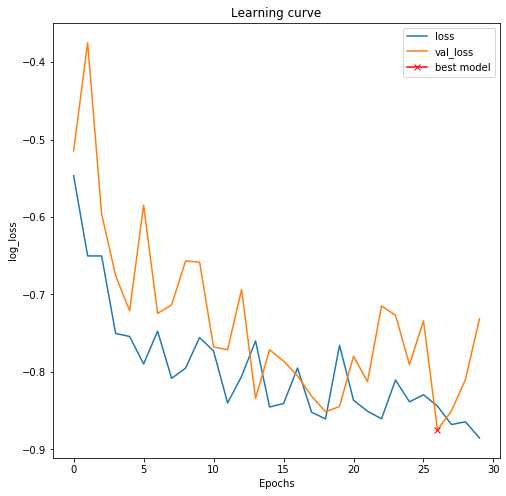

In [197]:
#meme poids
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();
plt.savefig('./spleenLoss.png')

# evaluation

In [97]:
modelL = get_unet()

modelL.load_weights(name)


In [98]:
print('Loading and preprocessing train data...')
print('-'*30)
imgs_train, imgs_mask_train = load_train_data()

Loading and preprocessing train data...
------------------------------


In [99]:
id = 110
test = imgs_train[id,:,:,:]
test -= mean
test /= std
y_pred = modelL.predict(test.reshape(1,256,256,1))

# results

0.0 0.99973017


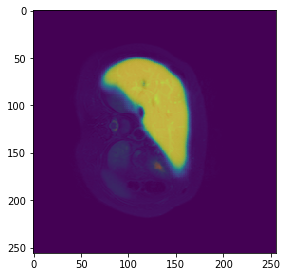

In [100]:
plt.figure(figsize=(20, 15))

for i in range(1):
    plt.subplot(1,4,i+1)
    plt.imshow(imgs_train[id,:,:,0])
    slice_ = y_pred[0,:,:,i]
    print(slice_.min(), slice_.max())
    plt.imshow(slice_,vmin = slice_.min(), vmax= slice_.max(),alpha=0.7)
plt.show()


# real

<function matplotlib.pyplot.show(*args, **kw)>

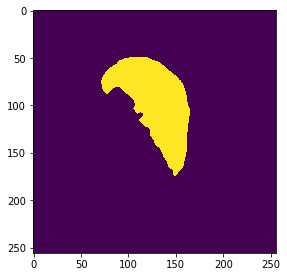

In [72]:
plt.figure(figsize=(20, 15))
for i in range(1):
    plt.subplot(1,4,i+1)
    slice_ = imgs_mask_train[id,:,:,i]
    #plt.imshow(imgs_train[id,:,:,0])
    plt.imshow(slice_)    
plt.show

# Right kidney neural network


In [190]:
#name = 'model_test_dice-80.h5' #medio funcional, adam 1e-5, loss=dice_coef_loss, metrics=[dice_coef] rkidney
nameRK = 'model_test_dice_1_rkidney.h5'
checkpoint = ModelCheckpoint(nameRK, verbose=1, save_best_only=True, save_weights_only=True)
modelRK = get_unet()

In [107]:
print('Loading and preprocessing train data...')
print('-'*30)
imgs_train, imgs_mask_train = load_train_data()
imgs_train = imgs_train.astype('float32')
mean = np.mean(imgs_train)  # mean for data centering
std = np.std(imgs_train)  # std for data normalization
imgs_train -= mean
imgs_train /= std
print("normalize")
np.savez_compressed('scaler',mean=mean,std=std)

resultsRK = modelRK.fit(imgs_train, imgs_mask_train[:,:,:,1:2], batch_size=32, epochs=100, callbacks=[checkpoint],shuffle=True,
              validation_split=0.2)

Loading and preprocessing train data...
------------------------------
normalize
Train on 200 samples, validate on 50 samples
Epoch 1/100
200/200 [==============================] - 6s 29ms/step - loss: -0.0086 - dice_coef_: 0.0086 - val_loss: -0.0051 - val_dice_coef_: 0.0051

Epoch 00001: val_loss improved from inf to -0.00512, saving model to model_test_dice_1_rkidney.h5
Epoch 2/100
200/200 [==============================] - 3s 16ms/step - loss: -0.0094 - dice_coef_: 0.0094 - val_loss: -0.0056 - val_dice_coef_: 0.0056

Epoch 00002: val_loss improved from -0.00512 to -0.00564, saving model to model_test_dice_1_rkidney.h5
Epoch 3/100
200/200 [==============================] - 3s 16ms/step - loss: -0.0102 - dice_coef_: 0.0102 - val_loss: -0.0063 - val_dice_coef_: 0.0063

Epoch 00003: val_loss improved from -0.00564 to -0.00627, saving model to model_test_dice_1_rkidney.h5
Epoch 4/100
200/200 [==============================] - 3s 16ms/step - loss: -0.0113 - dice_coef_: 0.0113 - val_loss: 

200/200 [==============================] - 3s 16ms/step - loss: -0.9138 - dice_coef_: 0.9138 - val_loss: -0.8431 - val_dice_coef_: 0.8431

Epoch 00036: val_loss did not improve from -0.89041
Epoch 37/100
200/200 [==============================] - 3s 16ms/step - loss: -0.9146 - dice_coef_: 0.9146 - val_loss: -0.8271 - val_dice_coef_: 0.8271

Epoch 00037: val_loss did not improve from -0.89041
Epoch 38/100
200/200 [==============================] - 3s 16ms/step - loss: -0.9188 - dice_coef_: 0.9188 - val_loss: -0.8458 - val_dice_coef_: 0.8458

Epoch 00038: val_loss did not improve from -0.89041
Epoch 39/100
200/200 [==============================] - 3s 16ms/step - loss: -0.9186 - dice_coef_: 0.9186 - val_loss: -0.8613 - val_dice_coef_: 0.8613

Epoch 00039: val_loss did not improve from -0.89041
Epoch 40/100
200/200 [==============================] - 3s 16ms/step - loss: -0.9293 - dice_coef_: 0.9293 - val_loss: -0.7729 - val_dice_coef_: 0.7729

Epoch 00040: val_loss did not improve from -0


Epoch 00075: val_loss did not improve from -0.89819
Epoch 76/100
200/200 [==============================] - 3s 16ms/step - loss: -0.9567 - dice_coef_: 0.9567 - val_loss: -0.8742 - val_dice_coef_: 0.8742

Epoch 00076: val_loss did not improve from -0.89819
Epoch 77/100
200/200 [==============================] - 3s 16ms/step - loss: -0.9571 - dice_coef_: 0.9571 - val_loss: -0.8852 - val_dice_coef_: 0.8852

Epoch 00077: val_loss did not improve from -0.89819
Epoch 78/100
200/200 [==============================] - 3s 16ms/step - loss: -0.9573 - dice_coef_: 0.9573 - val_loss: -0.8936 - val_dice_coef_: 0.8936

Epoch 00078: val_loss did not improve from -0.89819
Epoch 79/100
200/200 [==============================] - 3s 16ms/step - loss: -0.9573 - dice_coef_: 0.9573 - val_loss: -0.8781 - val_dice_coef_: 0.8781

Epoch 00079: val_loss did not improve from -0.89819
Epoch 80/100
200/200 [==============================] - 3s 16ms/step - loss: -0.9577 - dice_coef_: 0.9577 - val_loss: -0.8404 - val

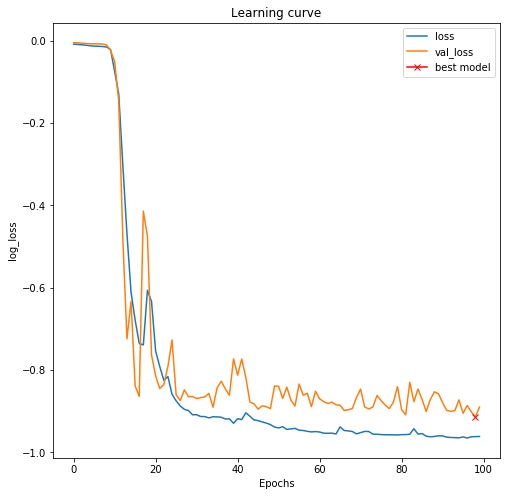

In [108]:
#meme poids
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

In [191]:
modelRK = get_unet()

modelRK.load_weights(nameRK)
print( nameRK)

model_test_dice_1_rkidney.h5


In [192]:
id = 15
test = imgs_train[id,:,:,:]
test -= mean
test /= std
y_pred = modelRK.predict(test.reshape(1,256,256,1))
np.unique(y_pred)

array([0.0000000e+00, 1.1878235e-38, 1.2171244e-38, ..., 9.9999976e-01,
       9.9999988e-01, 1.0000000e+00], dtype=float32)

0.0 1.0


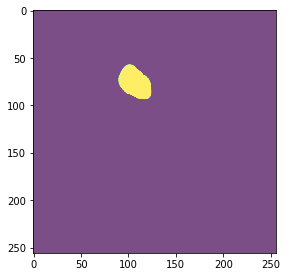

In [193]:
plt.figure(figsize=(20, 15))

for i in range(1):
    plt.subplot(1,4,i+1)
    #plt.imshow(imgs_train[id,:,:,0])
    slice_ = y_pred[0,:,:,i]
    print(slice_.min(), slice_.max())
    plt.imshow(slice_,vmin = slice_.min(), vmax= slice_.max(),alpha=0.7)
plt.show()


<function matplotlib.pyplot.show(*args, **kw)>

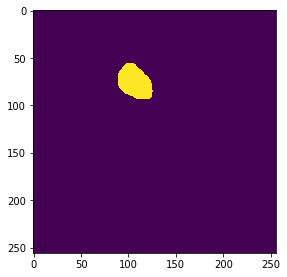

In [194]:
plt.figure(figsize=(20, 15))
for i in range(1):
    plt.subplot(1,4,i+1)
    slice_ = imgs_mask_train[id,:,:,i+1]
    #plt.imshow(imgs_train[id,:,:,0])
    plt.imshow(slice_)    
plt.show

# Spleen

In [156]:
#name = 'model_test_dice-80.h5' #medio funcional, adam 1e-5, loss=dice_coef_loss, metrics=[dice_coef] rkidney
nameS = 'model_test_dice_1_spleen.h5'
checkpoint = ModelCheckpoint(nameS, verbose=1, save_best_only=True, save_weights_only=True)
modelS = get_unet()
modelS.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_26 (InputLayer)           (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_476 (Conv2D)             (None, 256, 256, 32) 320         input_26[0][0]                   
__________________________________________________________________________________________________
conv2d_477 (Conv2D)             (None, 256, 256, 32) 9248        conv2d_476[0][0]                 
__________________________________________________________________________________________________
max_pooling2d_101 (MaxPooling2D (None, 128, 128, 32) 0           conv2d_477[0][0]                 
__________________________________________________________________________________________________
conv2d_478

In [157]:
print('Loading and preprocessing train data...')
print('-'*30)
imgs_train, imgs_mask_train = load_train_data()
imgs_train = imgs_train.astype('float32')
mean = np.mean(imgs_train)  # mean for data centering
std = np.std(imgs_train)  # std for data normalization
imgs_train -= mean
imgs_train /= std
print("normalize")
np.savez_compressed('scaler',mean=mean,std=std)

results = modelS.fit(imgs_train, imgs_mask_train[:,:,:,3:], batch_size=32, epochs=30, callbacks=[checkpoint],shuffle=True,
              validation_split=0.2)

Loading and preprocessing train data...
------------------------------
normalize
Train on 200 samples, validate on 50 samples
Epoch 1/30
200/200 [==============================] - 6s 31ms/step - loss: -0.0126 - dice_coef_: 0.0126 - val_loss: -0.0095 - val_dice_coef_: 0.0095

Epoch 00001: val_loss improved from inf to -0.00953, saving model to model_test_dice_1_spleen.h5
Epoch 2/30
200/200 [==============================] - 3s 16ms/step - loss: -0.0141 - dice_coef_: 0.0141 - val_loss: -0.0109 - val_dice_coef_: 0.0109

Epoch 00002: val_loss improved from -0.00953 to -0.01088, saving model to model_test_dice_1_spleen.h5
Epoch 3/30
200/200 [==============================] - 3s 16ms/step - loss: -0.0161 - dice_coef_: 0.0161 - val_loss: -0.0124 - val_dice_coef_: 0.0124

Epoch 00003: val_loss improved from -0.01088 to -0.01236, saving model to model_test_dice_1_spleen.h5
Epoch 4/30
200/200 [==============================] - 3s 16ms/step - loss: -0.0181 - dice_coef_: 0.0181 - val_loss: -0.0135

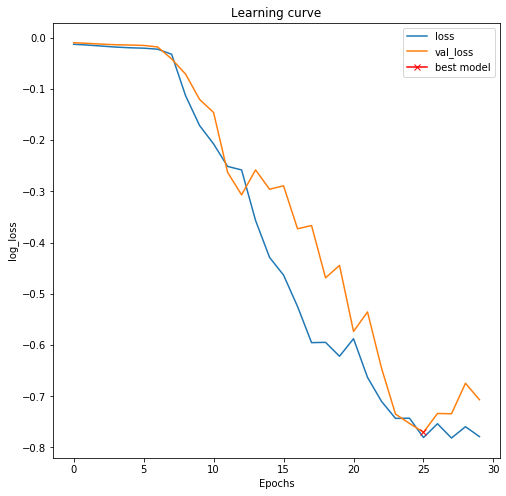

In [158]:
#meme poids
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

In [202]:
modelS = get_unet()

modelS.load_weights(nameS)


In [203]:
results = modelS.fit(imgs_train, imgs_mask_train[:,:,:,3:], batch_size=32, epochs=30, callbacks=[checkpoint],shuffle=True,
              validation_split=0.2)

Train on 200 samples, validate on 50 samples
Epoch 1/30
200/200 [==============================] - 6s 32ms/step - loss: -0.6983 - dice_coef_: 0.6983 - val_loss: -0.5046 - val_dice_coef_: 0.5046

Epoch 00001: val_loss improved from inf to -0.50459, saving model to model_test_dice_1_rkidney.h5
Epoch 2/30
200/200 [==============================] - 3s 16ms/step - loss: -0.7588 - dice_coef_: 0.7588 - val_loss: -0.7949 - val_dice_coef_: 0.7949

Epoch 00002: val_loss improved from -0.50459 to -0.79489, saving model to model_test_dice_1_rkidney.h5
Epoch 3/30
200/200 [==============================] - 3s 16ms/step - loss: -0.8139 - dice_coef_: 0.8139 - val_loss: -0.8021 - val_dice_coef_: 0.8021

Epoch 00003: val_loss improved from -0.79489 to -0.80206, saving model to model_test_dice_1_rkidney.h5
Epoch 4/30
200/200 [==============================] - 3s 16ms/step - loss: -0.8060 - dice_coef_: 0.8060 - val_loss: -0.8089 - val_dice_coef_: 0.8089

Epoch 00004: val_loss improved from -0.80206 to -0.

In [204]:
print('Loading and preprocessing train data...')
print('-'*30)
imgs_train, imgs_mask_train = load_train_data()

Loading and preprocessing train data...
------------------------------


In [205]:
id = 110

test = imgs_train[id,:,:,:]
test -= mean
test /= std
y_pred = modelS.predict(test.reshape(1,256,256,1))

0.0 3.0294234e-06


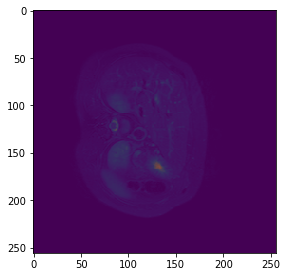

In [206]:
plt.figure(figsize=(20, 15))

for i in range(1):
    plt.subplot(1,4,i+1)
    plt.imshow(imgs_train[id,:,:,0])
    slice_ = y_pred[0,:,:,i]
    print(slice_.min(), slice_.max())
    plt.imshow(slice_,vmin = slice_.min(), vmax= slice_.max(),alpha=0.7)
plt.show()


<function matplotlib.pyplot.show(*args, **kw)>

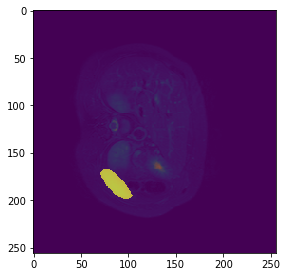

In [201]:
plt.figure(figsize=(20, 15))
for i in range(1):
    plt.subplot(1,4,i+1)
    slice_ = imgs_mask_train[id,:,:,3]
    plt.imshow(imgs_train[id,:,:,0])
    plt.imshow(slice_, alpha=0.7)    
plt.show

# image test

In [32]:
imgs_test = load_test_data()
imgs_test -= mean
imgs_test /= std

In [33]:
mask_predicts = model.predict(imgs_test)

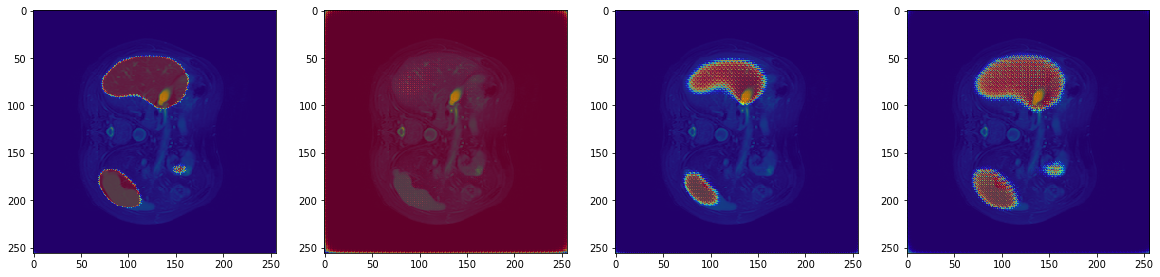

In [34]:
idx = 50
plt.figure(figsize=(20, 15))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(imgs_test[idx,:,:,0])
    slice_ = mask_predicts[idx,:,:,i]
    plt.imshow(slice_,vmin = slice_.min(), vmax= slice_.max(),cmap='jet', alpha=0.5)
plt.show()

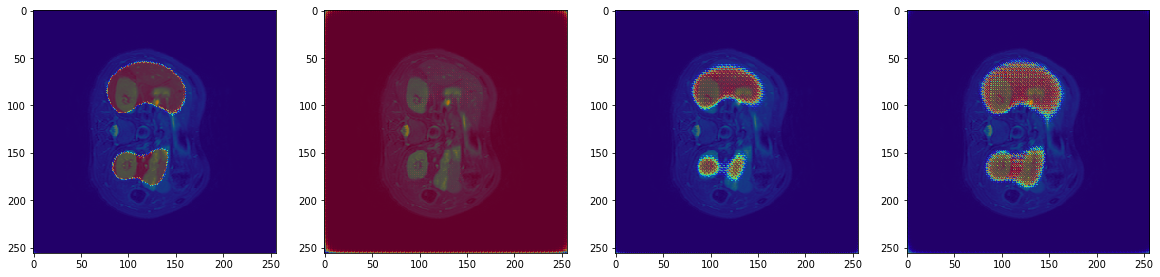

In [35]:
idx = 15
plt.figure(figsize=(20, 15))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(imgs_test[idx,:,:,0])
    slice_ = mask_predicts[idx,:,:,i]
    plt.imshow(slice_,vmin = slice_.min(), vmax= slice_.max(),cmap='jet', alpha=0.5)
plt.show()

In [ ]:
def get_unet4():
    inputs = Input((img_rows, img_cols, 1))
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

    up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

    up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

    up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

    up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

    conv10 = Conv2D(4,(1, 1), activation='sigmoid')(conv9)

    model = Model(inputs=[inputs], outputs=[conv10])
    #Adam(lr=1e-5)
    model.compile(optimizer=Adam(lr=1e-4), loss=dice_coef_loss, metrics=[dice_coef_])

    return model